In [45]:
include("../code/optimal_cycle.jl")
include("../code/bp_full_gfq.jl")
include("../code/ldpc_graph.jl")
function cycle_code(Q::Int, n::Int, R::Real; rng=MersenneTwister(0), T::Type=Int, kw...)
    @assert 0≤R≤1
    m = round(Int, n*(1-R))
    nedges, Lambda, Rho = generate_polyn(n,m,degree_type=:nodes)
    nedges = 2n
    H = permutedims(ldpc_matrix_gfq(Q,n,m,nedges,Lambda,Rho, accept_multi_edges=false,rng=rng,T=T; kw...))
end

cycle_code (generic function with 1 method)

In [46]:
const Q=2
n = 300
R = 0.86
H = Bool.(cycle_code(Q, n, R; rng=MersenneTwister(5), maxtrials=10^4, verbose=true))
s = rand((-1,1), n);

Factor graph generated after 406 trials


In [49]:
ener, ovl, σ = findsol(H, s)

Iter 1. Overlap -0.3467. Cycle weight -84.0. Energy shift -84
Iter 2. Overlap -0.6. Cycle weight -76.0. Energy shift -76
Iter 3. Overlap -0.7867. Cycle weight -56.0. Energy shift -56
Iter 4. Overlap -0.8733. Cycle weight -26.0. Energy shift -26
Iter 5. Overlap -0.9. Cycle weight -8.0. Energy shift -8
Iter 6. Overlap -0.9133. Cycle weight -4.0. Energy shift -4
Iter 7. Overlap -0.9133. Cycle weight 0.0. Energy shift 0


(0.9133333333333333, [0.3466666666666667, 0.6, 0.7866666666666666, 0.8733333333333333, 0.9, 0.9133333333333333, 0.9133333333333333, NaN, NaN, NaN  …  NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN], [-1, 1, 1, -1, 1, -1, -1, 1, 1, -1  …  1, -1, 1, -1, 1, -1, 1, 1, 1, -1])

In [55]:
D = mean(σ .!= s)

0.043333333333333335

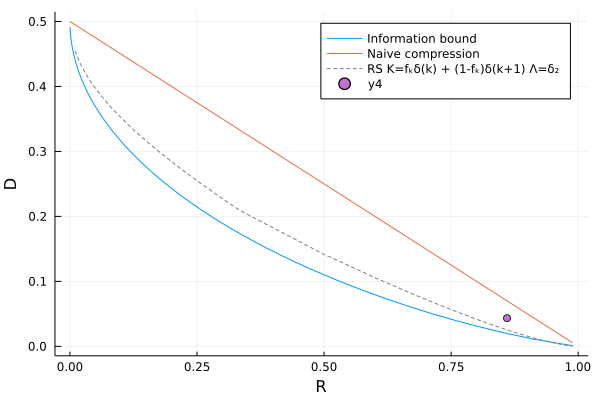

In [56]:
plot_rdb()
scatter!([R], [D])

In [122]:
ns = [600,2400,9600,9600*4]
Rs = 0.55:0.02:0.9
N = length(ns)
Nr = length(Rs)
ds = [[fill(0.0,navg) for _ in 1:Nr] for _ in 1:N];
navg = 20

20

In [ ]:
@showprogress for (j,R) in enumerate(Rs)
    for (i,n) in enumerate(ns)
        H = Bool.(cycle_code(Q, n, R; maxtrials=5*10^4, verbose=false))
        for k in 1:navg
            s = rand((-1,1), n)
            ener, ovl, σ = findsol(H, s, verbose=false)
            ds[i][j][k] = mean(σ .!= s)
        end
    end
end

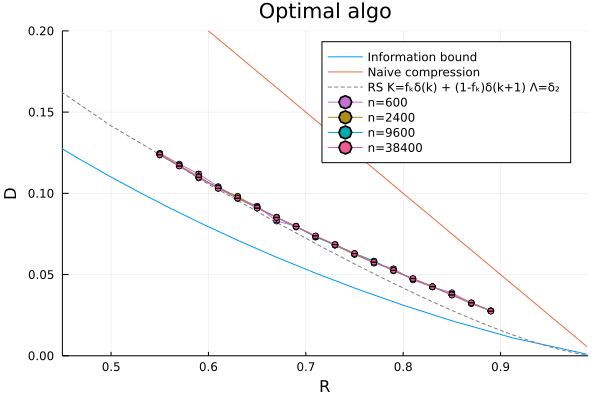

In [125]:
p = plot_rdb()
for (i,n) in enumerate(ns)
    plot!(p, Rs, mean.(ds[i]), yerr=std.(ds[i])/sqrt(navg), label="n=$n", ms=3, m=:o)
end
xlims!((Rs[1]-0.1, Rs[end]+0.1)); ylims!((0,0.2))
title!("Optimal algo")
p